# Face Recognition using Convolution neural network

import library

In [1]:
#Set up library
import numpy as np
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Activation, Dense
from keras.layers.core import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Step 1: Building CNN

In [2]:
nb_classes = 3

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
classifier.add(Dropout(0.1))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.1))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = nb_classes, activation = 'softmax'))

#classifier.add(Dense(units = nb_classes, activation = 'softmax'))
#classifier.add(Dense(nb_classes))
#classifier.add(Activation('softmax'))


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#classifier.compile(loss='categorical_crossentropy', optimizer='rmsprop')

### Step 2: Data pre-processing and data augmentation

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (32, 32),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (32, 32),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1350 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


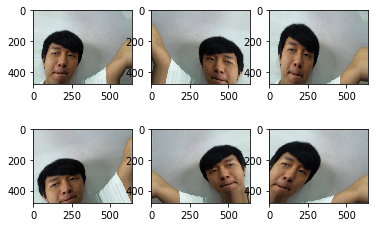

In [4]:
img = image.load_img('dataset/train/kum/kum.1.jpg')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
i = 0
for batch in train_datagen.flow(img_array, batch_size=1):
    i += 1
    if i > 6:
        break
    plt.subplot('23'+str(i))
    plt.imshow(batch[0])

### Step 3: Fit data with CNN model

In [5]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/5
1000/1000 [==============================] - 151s 151ms/step - loss: 0.2996 - acc: 0.8833 - val_loss: 0.4259 - val_acc: 0.8333
Epoch 2/5
1000/1000 [==============================] - 149s 149ms/step - loss: 0.1100 - acc: 0.9614 - val_loss: 0.3172 - val_acc: 0.8800
Epoch 3/5
1000/1000 [==============================] - 149s 149ms/step - loss: 0.0640 - acc: 0.9773 - val_loss: 0.2151 - val_acc: 0.9467
Epoch 4/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.0449 - acc: 0.9848 - val_loss: 0.3571 - val_acc: 0.9067
Epoch 5/5
1000/1000 [==============================] - 151s 151ms/step - loss: 0.0348 - acc: 0.9882 - val_loss: 0.2037 - val_acc: 0.9467


### Step 4: Making New Predictions

In [6]:
def predict_newdata(data):
    #prediction = ''
    images = image.img_to_array(data)
    images = np.expand_dims(images, axis = 0)
    result = classifier.predict(images)
    training_set.class_indices
    
    # If we have more than 2 category, the result will be one hot encoder matrix. 
    # We have to find the index of the max value.
    max_pos = np.argmax(result)
    
    if max_pos == 0:
        prediction = 'kum'
    elif max_pos == 1:
        prediction = 'r'
    elif max_pos == 2:
        prediction = 'trin'
        
    return prediction

Result : trin


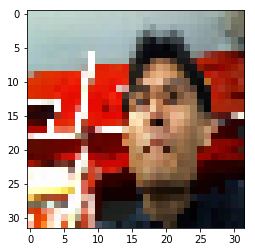

In [7]:
###Example Image to test your model
test = image.load_img('dataset/train/trin/trin.400.jpg', target_size = (32, 32))
plt.imshow(test)
print('Result :',predict_newdata(test))

Result : kum


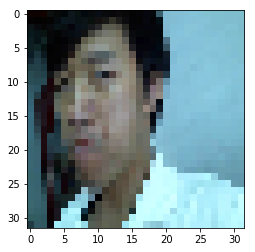

In [8]:
test = image.load_img('dataset/test/kum/kum.459.jpg', target_size = (32, 32))
plt.imshow(test)
print('Result :',predict_newdata(test))

Result : r


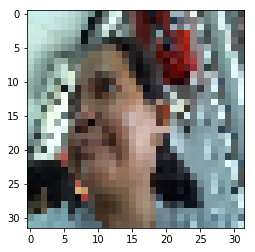

In [9]:
test = image.load_img('dataset/test/r/r.459.jpg', target_size = (32, 32))
plt.imshow(test)
print('Result :',predict_newdata(test))

Input all test set to model. If the target is "Kum", result is

In [10]:
classifier.save('face_recog_3faces.h5')